<a href="https://colab.research.google.com/github/anuragbantu/DL-Assignment-1/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import fashion_mnist




**Question 1**

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

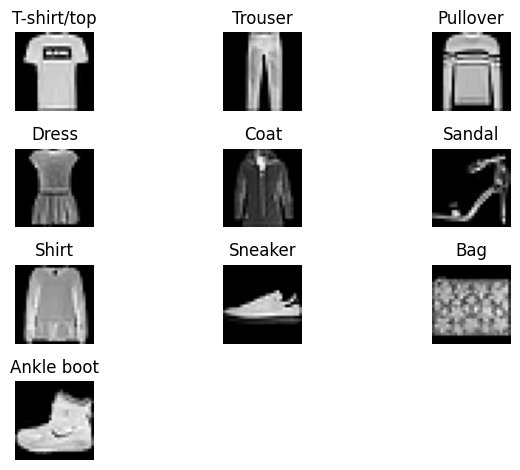

In [6]:
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(4, 3, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Question 2**

preparing the dataset.

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.0



In [13]:
y_train.shape

(60000, 10)

In [15]:
x_train.shape

(60000, 28, 28, 1)

Define a class for layers.

In [59]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_d(x):
  return sigmoid(x)*(1-sigmoid(x))

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

def softmax_d(x):
    diag_s = np.diag(x)

    outer_s = np.outer(x, x)
    return diag_s - outer_s

#CCE loss function
def categorical_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred), axis=-1)
    return np.mean(loss)

activations = {"sigmoid":sigmoid,"softmax":softmax}

derivatives = {"sigmoid":sigmoid_d,"softmax":softmax_d}





In [62]:
class layer:
  def __init__(self,input,neurons,activation):
    self.weights = np.random.randn(input,neurons)
    self.bias = np.zeros((1,neurons))
    self.activation = activations[activation]
    self.activation_d = derivatives[activation]

  def forward(self, a_prev):
    self.a_prev = a_prev
    self.z = np.dot(self.a_prev,self.weights) + self.bias
    self.a = self.activation(self.z)
    return self.a

  def backprop(self, a_d):
    z_d = np.multiple(self.activation_d(self.z),a_d)
    w_d = np.dot(self.a_prev.T,z_d)
    b_d = np.sum(z_d,axis=0,keepdims=True)
    a_prev_d = np.dot(z_d,self.weights.T)
    return w_d,b_d,a_prev_d

  def sgd(self,w_d,b_d,lr):
    self.weights -= lr*w_d
    self.bias -= lr*b_d





layers = [layer(784,784,"sigmoid"),layer(784,10,"sigmoid"),layer(10,10,"softmax")]

In [53]:
x_train = x_train.reshape(x_train.shape[0], -1)


a= x_train
for layer in layers:
  a = layer.forward(a)

a

array([[0.00527177, 0.0080545 , 0.0089056 , ..., 0.18411585, 0.04685117,
        0.11512817],
       [0.00516566, 0.00822964, 0.00888458, ..., 0.18569021, 0.04754623,
        0.11166002],
       [0.00505587, 0.00835164, 0.00882889, ..., 0.185949  , 0.04799453,
        0.10799781],
       ...,
       [0.00510943, 0.00826108, 0.00883476, ..., 0.1849106 , 0.04759279,
        0.10966353],
       [0.00506725, 0.00837577, 0.00885568, ..., 0.18680549, 0.04812431,
        0.1084464 ],
       [0.00513911, 0.00822199, 0.00885561, ..., 0.18508711, 0.0475188 ,
        0.11075476]])

In [54]:
sum(a[1])

1.0

In [ ]:
a_d =

# Question 3

Implement backpropagation algorithm

In [8]:
def backprop(self):
  return

layer.backprop  = backprop